<a href="https://colab.research.google.com/github/Rezamoghadam8810/Algorithmic_trading_tutorial/blob/main/Defining_and_Testing_Trading_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating and Backtesting SMA Strategies**

**Getting the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/eurusd.csv", parse_dates=["Date"],index_col="Date")

In [3]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


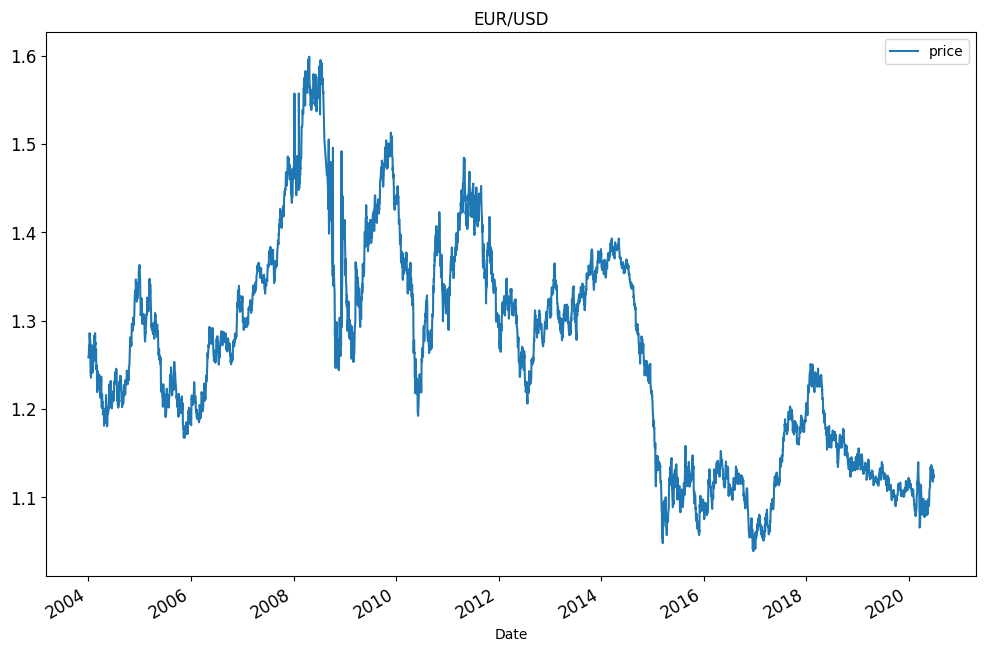

In [5]:
df.plot(figsize=(12,8), title="EUR/USD", fontsize=12)
plt.show()

In [6]:
df["returns"]=np.log(df.div(df.shift(1)))

In [7]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


**A Simple Buy and hold "Strategy**

In [8]:
df.dropna(inplace=True)

In [9]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


AttributeError: module 'matplotlib.pyplot' has no attribute 'titile'

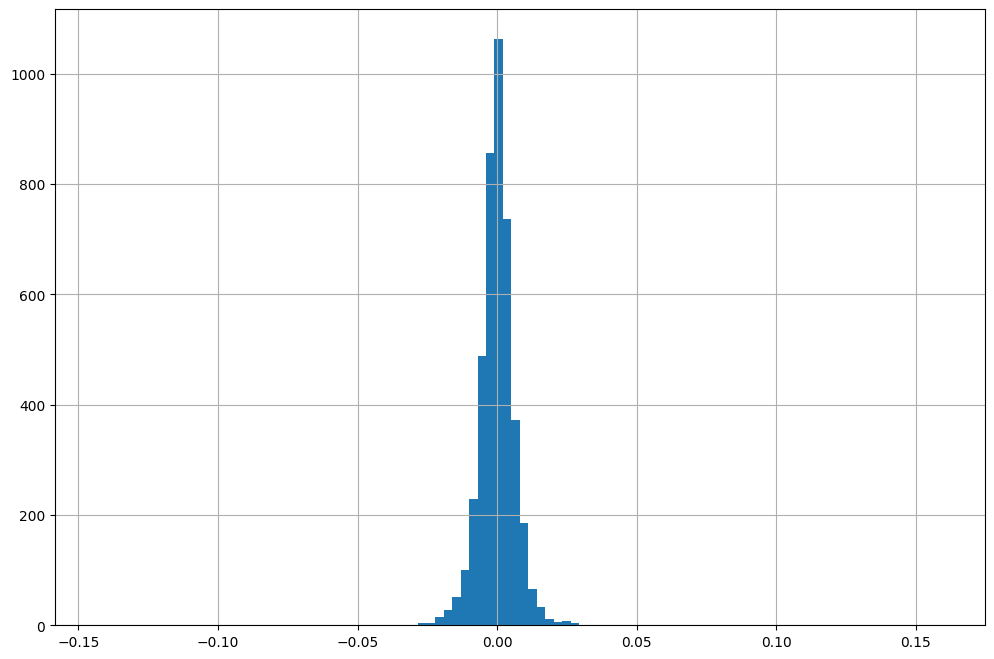

In [10]:
df.returns.hist(bins=100,figsize=(12,8))
plt.titile("EUR/USD returns")
plt.show()

In [11]:
df.returns.sum()

np.float64(-0.11214302770699758)

In [12]:
np.exp(df.returns.sum())

np.float64(0.8939163935445148)

In [13]:
df.price[-1]/df.price[0]

<ipython-input-13-d96e2c17c624>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.price[-1]/df.price[0]


np.float64(0.8939163935445141)

In [14]:
df.returns.cumsum().apply(np.exp)

,returns
Date,
2004-01-02,1.000000
2004-01-05,1.008348
2004-01-06,1.011055
2004-01-07,1.004690
2004-01-08,1.015343
...,...
2020-06-24,0.899094
2020-06-25,0.894208
2020-06-26,0.891920


In [15]:
df["creturns"]=df.returns.cumsum().apply(np.exp)

In [16]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [17]:
df.creturns.iloc[-1] # obsolute Performance

np.float64(0.8939163935445149)

In [18]:
df.returns.sum()

np.float64(-0.11214302770699758)

In [19]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


In [20]:
df.returns.mean()*252

np.float64(-0.006612083056191715)

In [21]:
df.returns.std()

0.007593382157663366

In [22]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [23]:
df["cummax"] = df.creturns.cummax()

In [24]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


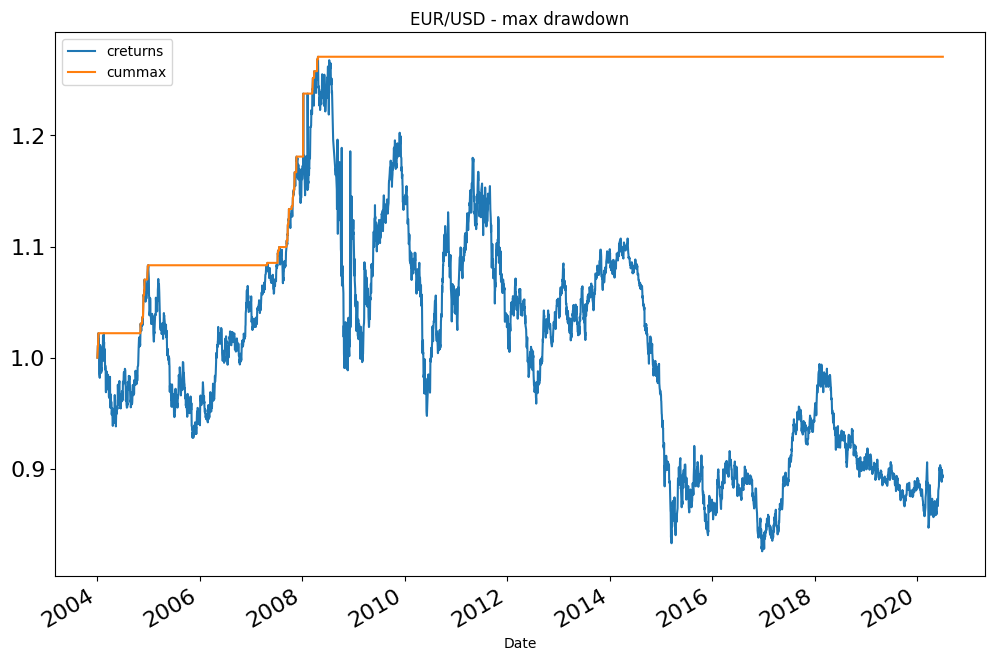

In [25]:
df[["creturns","cummax"]].dropna().plot(figsize=(12,8),title="EUR/USD - max drawdown", fontsize=16)
plt.show()

In [27]:
deawdown = df["cummax"] - df["creturns"]
deawdown

,0
Date,
2004-01-02,0.000000
2004-01-05,0.000000
2004-01-06,0.000000
2004-01-07,0.006365
2004-01-08,0.000000
...,...
2020-06-24,0.371615
2020-06-25,0.376500
2020-06-26,0.378788
